<a href="https://colab.research.google.com/github/Zxx1022/CV/blob/main/CV_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1: Extend Otsu's method


### preprocessing
Import PIL to import,display,output images.  
Import numpy to store RGB array from bmp image

In [ ]:
import PIL
from PIL import Image
import numpy as np

Load image function and convert it in to numpy array

In [ ]:
def load_img(Img_path):
  #load image with PIL.Image
  Img = Image.open(Img_path)
  #show image
  display(Img)
  print("shape of input image:",Img.format, Img.size, Img.mode)
  #convert image to numpy array
  darray = np.array(Img)
  #shape of array
  darray.shape
  return darray

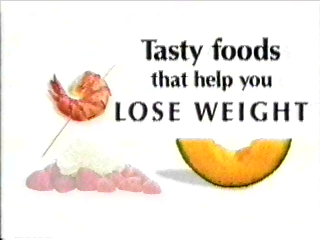

shape of input image: BMP (320, 240) RGB


In [ ]:
data = load_img("/content/sample_data/data13.bmp")

Convert RGB to grayscale image. With formula, I = 0.299R+0.587G+0.114B  
img is a np.array.For example, data13.bmp convert to np.array with size(320x240x3)  
img[:,:,0],img[:,:,1],img[:,:,2] in order of B,G,R channel.  


In [ ]:
#split image into sequence B,G,R
def rgbtogray(img): 
  r,g,b = img[:,:,0],img[:,:,1],img[:,:,2]
  I = 0.299*r +0.587*g + 0.114*b
  print(I)
  I = I.reshape(I.shape[0],I.shape[1])
  I = I.astype('uint8')
  return I,I.size

### Otsu's method

To calculate histogram by using grayscale array

In [ ]:
def histogram(gray):
  count= np.zeros((np.amax(gray)+1,),dtype = int) #initial counter of pixels with all 0 value
  for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
      index = gray[i,j]
      count[index] = count[index]+1
  return count


calculate weight and mean of a intervals

In [ ]:
def weightandmean(start,tn,count,sum):
  num = count.size
  temp_m = 0
  num_inter = 0
  for i in range(start,tn+1):
    num_inter = num_inter + count[i]
    temp_m = temp_m + count[i]*i
  weight = num_inter/sum
  if num_inter == 0:
    mean = 0
  else:
    mean = temp_m/num_inter
  return weight,mean,num_inter


calculate variance of each interval

In [ ]:
def weight_and_variance(start,tn,count,sum):
  w,m,num_i = weightandmean(start,tn,count,sum)
  temp = 0
  for i in range(start,tn+1):
    t1 = ((i-m)**2)*count[i]
    temp = temp + t1
  if num_i == 0:
    variance = 0
  else:
    variance = temp/num_i
  return w,variance

calculation of $\$

In [ ]:
def find_3_t(count,sum):#dynamic matrix to store
  storage = np.full((count.size+1,count.size+1),-1)
  temp = (sum**3)
  th1=0
  th2=0
  th3=0

  for t3 in range(2,count.size):
    print(t3)
    if storage[t3,count.size-1] ==-1:
       w4,v4 = weight_and_variance(t3,count.size-1,count,sum)
       var2_4 = w4*v4
       storage[t3+1,count.size-1] = var2_4
    else:
       var2_4 = storage[t3,count.size-1]

    for t2 in range(0,t3):
      if storage[t2,t3] ==-1:
        w3,v3 = weight_and_variance(t2,t3,count,sum)
        var2_3 = w3*v3
        storage[t2,t3] = var2_3
      else:
        var2_3 = storage[t2,t3]

      for t1 in range(0,t2):
        if storage[t1,t2]==-1:
          w2,v2 =  weight_and_variance(t1,t2,count,sum)
          var2_2 = w2*v2
          storage[t1,t2]= var2_2
        else:
          var2_2 =  storage[t1,t2]

        if storage[0,t1] == -1:
          
          w1,v1 =  weight_and_variance(0,t1,count,sum)
          var2_1 = w1*v1
          storage[0,t1]=var2_1
        else:
          var2_1 = storage[0,t1]

        var2_sum = var2_1 +var2_2+var2_3+var2_4

        if temp>var2_sum:
          temp = var2_sum
          th1 = t1
          th2 = t2
          th3 = t3
          
  return th1,th2,th3

In [ ]:
def outputimg(grayIMG,t1,t2,t3):
  gray = grayIMG
  row = gray.shape[0]
  col = gray.shape[1]
  for i in range(row):
    for j in range(col):
      temp = gray[i][j]
      if temp in range(0,t1+1):
        gray[i][j]=0
      if temp in range(t1+1,t2+1):
        gray[i][j]=t2
      if temp in range(t2+1,t3+1):
        gray[i][j]=t3
      if temp in range(t3+1,256):
        gray[i][j]=255
  return gray

In [ ]:
data13 = "/content/sample_data/data13.bmp"
fruits = "/content/sample_data/fruits2b.bmp"
tiger24 = "/content/sample_data/tiger1-24bits.bmp"

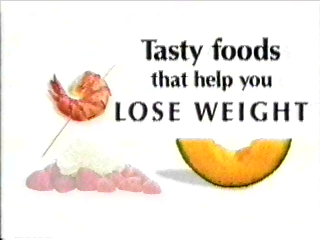

shape of input image: BMP (320, 240) RGB


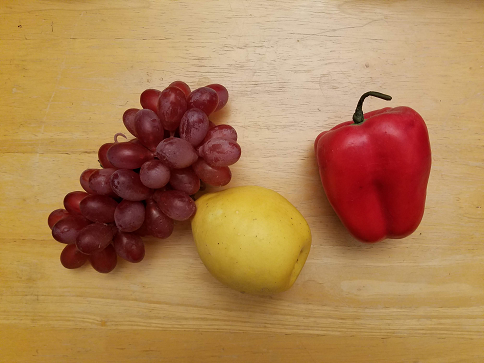

shape of input image: BMP (484, 363) RGB


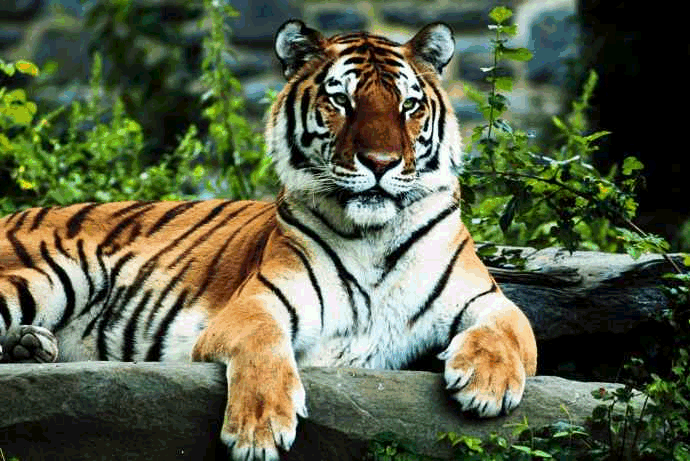

shape of input image: BMP (690, 461) RGB


In [ ]:
a_data = load_img(data13)
a_fruit = load_img(fruits)
a_tiger = load_img(tiger24)

In [ ]:
g_data,n_data = rgbtogray(a_data)
g_fruit,n_fruit = rgbtogray(a_fruit)
g_tiger,n_tiger = rgbtogray(a_tiger)

[[210. 210. 210. ... 210. 210. 210.]
 [210. 251. 255. ... 255. 255. 255.]
 [214. 255. 255. ... 255. 255. 255.]
 ...
 [121. 210. 247. ... 255. 255. 255.]
 [ 42. 130. 158. ... 255. 255. 255.]
 [  0.  56. 168. ... 255. 255. 255.]]
[[138.408 140.146 137.479 ... 117.935 117.26  117.978]
 [136.445 142.408 140.032 ... 122.619 124.26  124.277]
 [140.217 141.821 140.18  ... 124.277 119.391 127.391]
 ...
 [135.064 141.064 137.853 ... 141.98  141.453 144.305]
 [137.933 135.836 136.571 ... 142.795 140.991 142.991]
 [135.773 132.212 132.887 ... 145.208 141.367 141.481]]
[[37.696 37.696 37.696 ...  0.     0.     0.   ]
 [37.696 37.696 37.696 ...  0.     0.     0.   ]
 [37.696 37.696 37.696 ...  0.     0.     0.   ]
 ...
 [ 7.088 38.15  14.176 ... 68.851 68.851 68.851]
 [14.176 14.176  0.    ... 80.697 68.851 68.851]
 [29.238  7.088 14.176 ... 99.001 89.702 89.702]]


In [ ]:
count_d = histogram(g_data)
count_f = histogram(g_fruit)
count_t = histogram(g_tiger)

In [ ]:
d1,d2,d3 = find_3_t(count_d,n_data)
print("t1,t2,t3 of data13.bmp:",d1,d2,d3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
t1,t2,t3 of data13.bmp: 0 253 254


In [ ]:
f1,f2,f3 = find_3_t(count_f,n_fruit)
print("t1,t2,t3 of data13.bmp:",f1,f2,f3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
t1,t2,t3 of data13.bmp: 0 213 214


In [ ]:
t1,t2,t3 = find_3_t(count_t,n_tiger)
print("t1,t2,t3 of data13.bmp:",t1,t2,t3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
t1,t2,t3 of data13.bmp: 0 241 242


In [ ]:
output_data = outputimg(g_data,d1,d2,d3)
output_fruit = outputimg(g_fruit,f1,f2,f3)
output_tiger = outputimg(g_tiger,t1,t2,t3)

In [ ]:
np.amax(output_tiger)

255

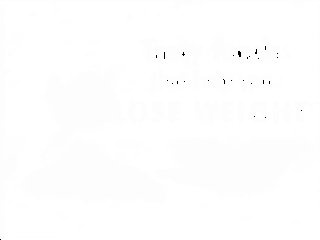

In [ ]:
PIL_image = Image.fromarray(output_data, 'L')
PIL_image

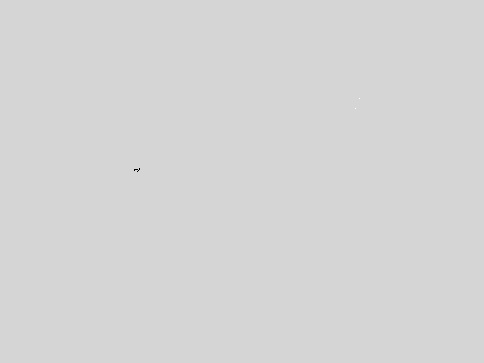

In [ ]:
PIL_image1 = Image.fromarray(output_fruit, 'L')
PIL_image1

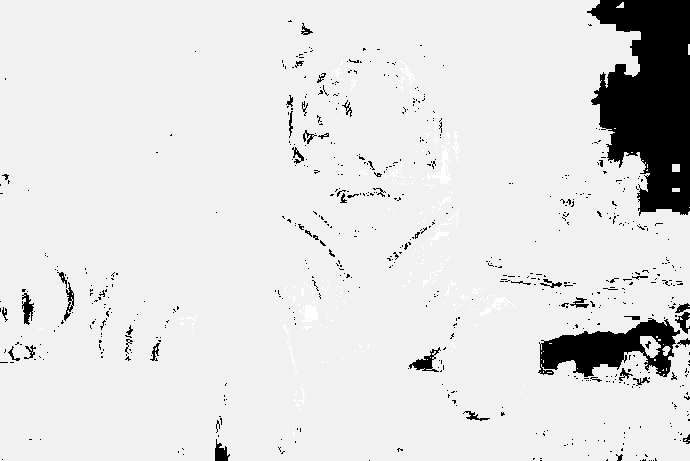

In [ ]:
PIL_image2 = Image.fromarray(output_tiger, 'L')
PIL_image2

In [ ]:
PIL_image.save("data13_out.bmp")
PIL_image1.save("fruits2b_out.bmp")
PIL_image2.save("tiger1-24bits_out.bmp")